In [61]:
import numpy as np 
import pandas as pd
from sklearn.metrics import zero_one_loss, mean_squared_error
import time
import matplotlib.pyplot as plt
import os
import seaborn as sns 
import matplotlib.pyplot as plt

In [43]:
#get all required dataset files
tiVsAlgFiles = os.listdir('C:\\Users\\hasna\\Documents\\GitHub\\OccupancyDetection\\Results\\Algorithm vs TI')
groundTruthFiles = os.listdir('C:\\Users\\hasna\\Documents\\GitHub\\OccupancyDetection\\Results\\Ground Truth')

### Misclassification and Accuracy

[Text(0, 0, '1PersonWalkingLocationAlan.csv'),
 Text(0, 0, '2PeopleTableInterview.csv'),
 Text(0, 0, '2PeopleWalkingLocation.csv'),
 Text(0, 0, '2PeopleWalkingOppositeEndsLocation.csv'),
 Text(0, 0, '3PeopleInterview.csv'),
 Text(0, 0, '3PeopleSpeedDate.csv'),
 Text(0, 0, '3PeopleWalking.csv'),
 Text(0, 0, '4PeopleTableInterview.csv'),
 Text(0, 0, '4PeopleWalking.csv'),
 Text(0, 0, 'Interview.csv')]

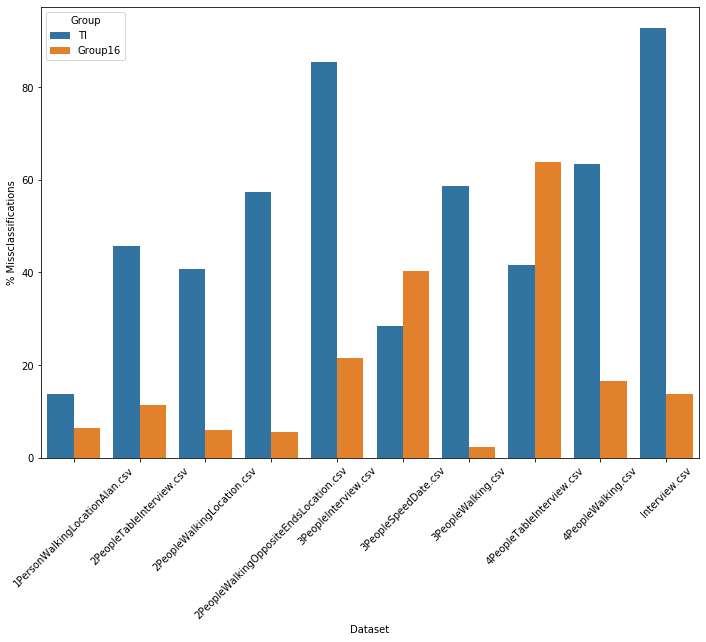

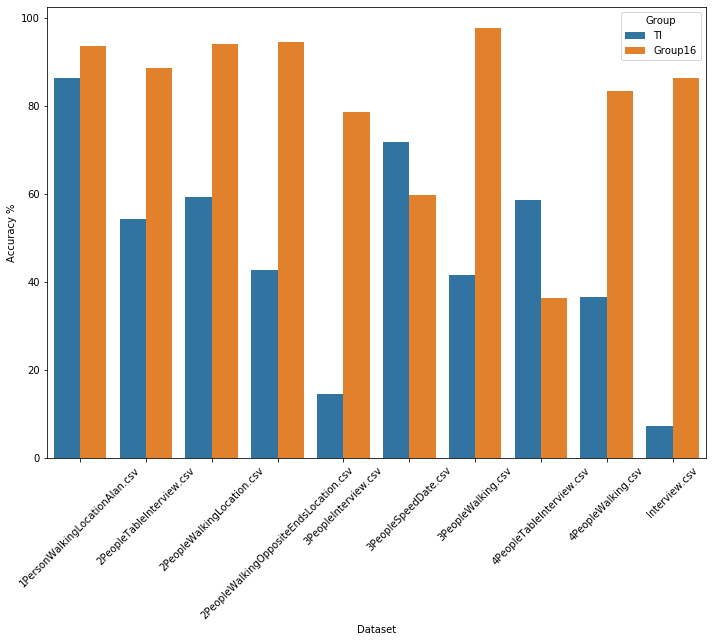

In [59]:
missclassifications = np.array([])
accuracy = np.array([])
for name in tiVsAlgFiles:
    path = 'C:\\Users\\hasna\\Documents\\GitHub\\OccupancyDetection\\Results\\Algorithm vs TI\\' + name
    tiVsAlgDf = pd.read_csv(path, usecols=['TI', 'Group 16'], dtype=int)
    path = 'C:\\Users\\hasna\\Documents\\GitHub\\OccupancyDetection\\Results\\Ground Truth\\' + name
    groundTruthDf = pd.read_csv(path, usecols=['Expected Kalman'], dtype=int)
    
    #remove rows with 111 in them (invalid rows)
    mask = np.logical_not(np.equal(groundTruthDf.values, 111))
    groundTruthDf = groundTruthDf[mask]
    tiVsAlgDf = tiVsAlgDf[mask]
    
    #compare the ground truth to TI
    if missclassifications.size == 0:
        missclassifications = np.array([zero_one_loss(groundTruthDf['Expected Kalman'], tiVsAlgDf['TI'])*100, 'TI', name])
        accuracy = np.array([np.subtract(100,zero_one_loss(groundTruthDf['Expected Kalman'], tiVsAlgDf['TI'])*100), 'TI', name])
        missclassifications = np.vstack((missclassifications,
                                        np.array([zero_one_loss(groundTruthDf['Expected Kalman'], tiVsAlgDf['Group 16'])*100, 'Group16',name])))
        accuracy = np.vstack((accuracy, np.array([np.subtract(100,zero_one_loss(groundTruthDf['Expected Kalman'], tiVsAlgDf['Group 16'])*100), 'Group16',name])))
    else:
        missclassifications = np.vstack((missclassifications,
                                        np.array([zero_one_loss(groundTruthDf['Expected Kalman'], tiVsAlgDf['TI'])*100, 'TI',name])))
        accuracy = np.vstack((accuracy, np.array([np.subtract(100,zero_one_loss(groundTruthDf['Expected Kalman'], tiVsAlgDf['TI'])*100), 'TI',name])))
        
        missclassifications = np.vstack((missclassifications,
                                        np.array([zero_one_loss(groundTruthDf['Expected Kalman'], tiVsAlgDf['Group 16'])*100, 'Group16',name])))
    
        accuracy = np.vstack((accuracy, np.array([np.subtract(100,zero_one_loss(groundTruthDf['Expected Kalman'], tiVsAlgDf['Group 16'])*100), 'Group16',name])))

missclassificationsDf = pd.DataFrame(missclassifications)
missclassificationsDf.columns = ['% Missclassifications', 'Group', 'Dataset']
missclassificationsDf['% Missclassifications'] = missclassificationsDf['% Missclassifications'].astype(dtype=np.float32)

accuracyDf = pd.DataFrame(accuracy)
accuracyDf.columns = ['Accuracy %', 'Group', 'Dataset']
accuracyDf['Accuracy %'] = accuracyDf['Accuracy %'].astype(dtype=np.float32)

fig, ax = plt.subplots()
fig.set_size_inches(11.8, 8.3)
missPlot = sns.barplot(x='Dataset', y='% Missclassifications', hue='Group', data=missclassificationsDf)
missPlot.set_xticklabels(missPlot.get_xticklabels(), rotation=45)

fig, ax = plt.subplots()
fig.set_size_inches(11.8, 8.3)
accPlot = sns.barplot(x='Dataset', y='Accuracy %', hue='Group', data=accuracyDf)
accPlot.set_xticklabels(accPlot.get_xticklabels(), rotation=45)

### RMSE (unit People)

[Text(0, 0, '1PersonWalkingLocationAlan.csv'),
 Text(0, 0, '2PeopleTableInterview.csv'),
 Text(0, 0, '2PeopleWalkingLocation.csv'),
 Text(0, 0, '2PeopleWalkingOppositeEndsLocation.csv'),
 Text(0, 0, '3PeopleInterview.csv'),
 Text(0, 0, '3PeopleSpeedDate.csv'),
 Text(0, 0, '3PeopleWalking.csv'),
 Text(0, 0, '4PeopleTableInterview.csv'),
 Text(0, 0, '4PeopleWalking.csv'),
 Text(0, 0, 'Interview.csv')]

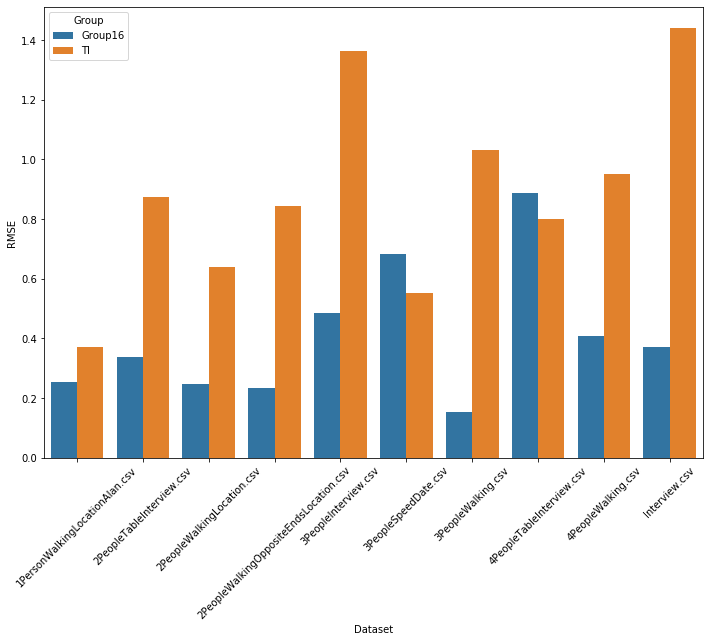

In [62]:
rmse = np.array([])
for name in tiVsAlgFiles:
    path = 'C:\\Users\\hasna\\Documents\\GitHub\\OccupancyDetection\\Results\\Algorithm vs TI\\' + name
    tiVsAlgDf = pd.read_csv(path, usecols=['TI', 'Group 16'], dtype=int)
    path = 'C:\\Users\\hasna\\Documents\\GitHub\\OccupancyDetection\\Results\\Ground Truth\\' + name
    groundTruthDf = pd.read_csv(path, usecols=['Expected Kalman'], dtype=int)
    
    #remove rows with 111 in them (invalid rows)
    mask = np.logical_not(np.equal(groundTruthDf.values, 111))
    groundTruthDf = groundTruthDf[mask]
    tiVsAlgDf = tiVsAlgDf[mask]
    
    if rmse.size == 0:
        rmseAlg = np.sqrt(mean_squared_error(groundTruthDf['Expected Kalman'], tiVsAlgDf['Group 16']))
        rmse = np.array([rmseAlg, 'Group16', name])
        rmseTi = np.sqrt(mean_squared_error(groundTruthDf['Expected Kalman'], tiVsAlgDf['TI']))
        rmse = np.vstack((rmse,np.array([rmseTi,'TI',name])))
    else:
        rmseAlg = np.sqrt(mean_squared_error(groundTruthDf['Expected Kalman'], tiVsAlgDf['Group 16']))
        rmse = np.vstack((rmse,np.array([rmseAlg, 'Group16',name])))
        rmseTi = np.sqrt(mean_squared_error(groundTruthDf['Expected Kalman'], tiVsAlgDf['TI']))
        rmse = np.vstack((rmse,np.array([rmseTi,'TI',name])))
    

rmseDf = pd.DataFrame(rmse)
rmseDf.columns = ['RMSE', 'Group', 'Dataset']
rmseDf['RMSE'] = rmseDf['RMSE'].astype(dtype=np.float32)

fig, ax = plt.subplots()
fig.set_size_inches(11.8, 8.3)
rmsePlot = sns.barplot(x='Dataset', y='RMSE', hue='Group', data=rmseDf)
rmsePlot.set_xticklabels(rmsePlot.get_xticklabels(), rotation=45)    

### Error Types
<html>
    <ul>
        <li> Limitations of the Algorithms </li>
        <li> Sensor Limitations </li>
        <ul>
            <li> Unexplainable missing persons from within the field of view of the sensor </li>
            <li> Occlusions </li>
            <li> Noise from static objects </li> 
        </ul>
    </ul>
</html>


## Parameter Optimization - Clustering

## Q R Graph 

## Accuracy of KF vs EKF 